# Weather Ajusco

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 18})

In [2]:
df = pd.read_csv('data/periodo_-2016-06-01-12_00_00-a--2018-07-31-12_00_00.csv')

In [3]:
df = df.rename(columns={"Fecha":"date", "Temperatura":"temperature", "Humedad":"humidity","Precipitación Total":"total_precipitation"})

In [4]:
df

,date,temperature,humidity,total_precipitation
0,2016-06-01 12,20.49,56.38,0.0
1,2016-06-01 13,21.99,47.39,0.0
2,2016-06-01 14,23.33,42.70,0.0
3,2016-06-01 15,23.53,44.16,0.0
4,2016-06-01 16,22.73,45.51,0.0
...,...,...,...,...
18954,2018-07-31 08,15.23,68.27,0.0
18955,2018-07-31 09,16.70,66.64,0.0
18956,2018-07-31 10,17.86,61.33,0.0
18957,2018-07-31 11,19.28,55.07,0.0


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H')

In [6]:
df['year_month'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H').dt.to_period('M')

In [7]:
df

,date,temperature,humidity,total_precipitation,year_month
0,2016-06-01 12:00:00,20.49,56.38,0.0,2016-06
1,2016-06-01 13:00:00,21.99,47.39,0.0,2016-06
2,2016-06-01 14:00:00,23.33,42.70,0.0,2016-06
3,2016-06-01 15:00:00,23.53,44.16,0.0,2016-06
4,2016-06-01 16:00:00,22.73,45.51,0.0,2016-06
...,...,...,...,...,...
18954,2018-07-31 08:00:00,15.23,68.27,0.0,2018-07
18955,2018-07-31 09:00:00,16.70,66.64,0.0,2018-07
18956,2018-07-31 10:00:00,17.86,61.33,0.0,2018-07
18957,2018-07-31 11:00:00,19.28,55.07,0.0,2018-07


In [8]:
df['year_month']=df['year_month'].astype(str)
df['year_month'] = pd.to_datetime(df['year_month'],format='%Y-%m')
df

,date,temperature,humidity,total_precipitation,year_month
0,2016-06-01 12:00:00,20.49,56.38,0.0,2016-06-01
1,2016-06-01 13:00:00,21.99,47.39,0.0,2016-06-01
2,2016-06-01 14:00:00,23.33,42.70,0.0,2016-06-01
3,2016-06-01 15:00:00,23.53,44.16,0.0,2016-06-01
4,2016-06-01 16:00:00,22.73,45.51,0.0,2016-06-01
...,...,...,...,...,...
18954,2018-07-31 08:00:00,15.23,68.27,0.0,2018-07-01
18955,2018-07-31 09:00:00,16.70,66.64,0.0,2018-07-01
18956,2018-07-31 10:00:00,17.86,61.33,0.0,2018-07-01
18957,2018-07-31 11:00:00,19.28,55.07,0.0,2018-07-01


In [9]:
df.dtypes

date                   datetime64[ns]
temperature                   float64
humidity                      float64
total_precipitation           float64
year_month             datetime64[ns]
dtype: object

## Datos diarios

In [10]:
average = df.groupby([df['date'].dt.date]).mean().reset_index()

In [11]:
daily_sum = df.groupby([df['date'].dt.date]).sum().reset_index()

In [12]:
average

,date,temperature,humidity,total_precipitation
0,2016-06-01,21.060833,53.145000,0.050000
1,2016-06-02,17.815833,66.059167,0.070833
2,2016-06-03,18.024583,59.547917,0.004167
3,2016-06-04,18.484583,49.182083,0.000000
4,2016-06-05,15.842917,65.273750,0.462500
...,...,...,...,...
786,2018-07-27,17.200000,60.488750,0.325000
787,2018-07-28,16.808333,67.302917,0.379167
788,2018-07-29,18.085833,58.391667,0.079167
789,2018-07-30,17.839167,59.319167,0.129167


In [13]:
daily_sum

,date,temperature,humidity,total_precipitation
0,2016-06-01,252.73,637.74,0.6
1,2016-06-02,427.58,1585.42,1.7
2,2016-06-03,432.59,1429.15,0.1
3,2016-06-04,443.63,1180.37,0.0
4,2016-06-05,380.23,1566.57,11.1
...,...,...,...,...
786,2018-07-27,412.80,1451.73,7.8
787,2018-07-28,403.40,1615.27,9.1
788,2018-07-29,434.06,1401.40,1.9
789,2018-07-30,428.14,1423.66,3.1


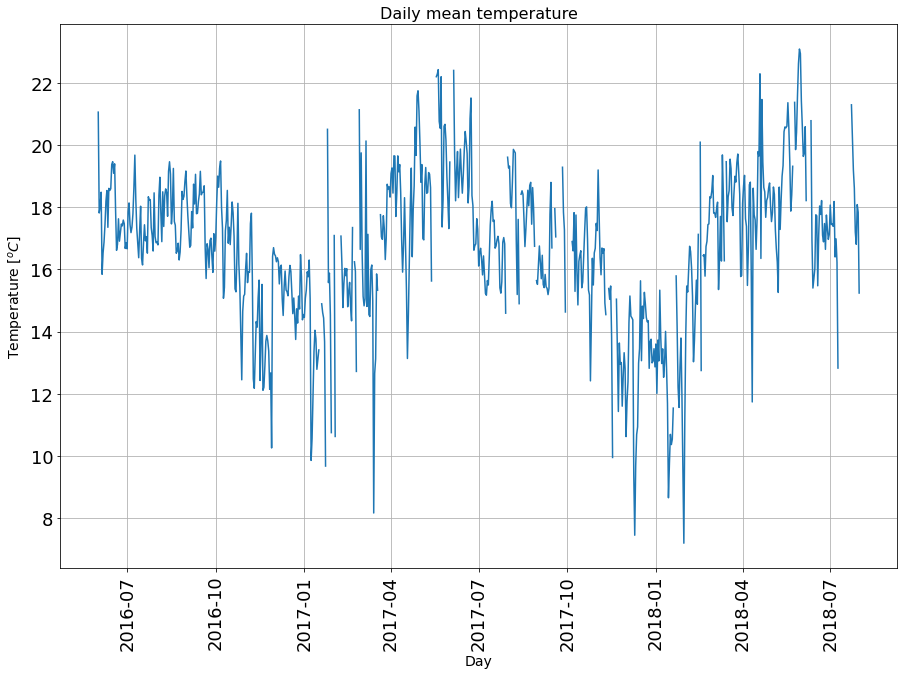

In [14]:
plt.plot(average['date'],average['temperature'])
plt.xticks(rotation='vertical')
plt.title('Daily mean temperature',fontsize=16)
plt.ylabel(r'Temperature $[^o C]$',fontsize=14)
plt.xlabel('Day',fontsize=14)
plt.grid()

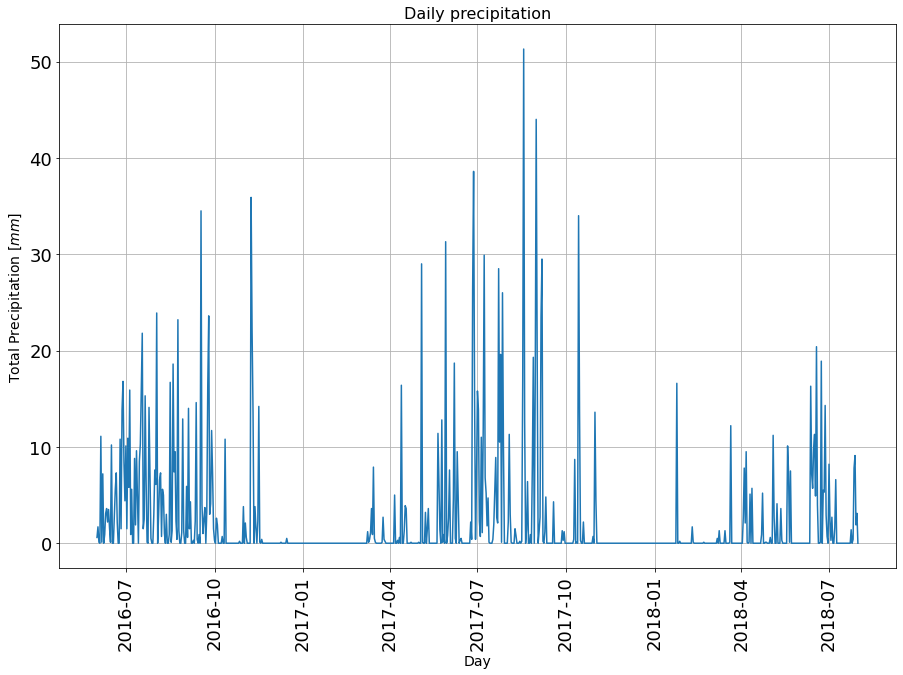

In [15]:
plt.plot(daily_sum['date'],daily_sum['total_precipitation'])
plt.xticks(rotation='vertical')
plt.title('Daily precipitation',fontsize=16)
plt.ylabel(r'Total Precipitation $[mm]$',fontsize=14)
plt.xlabel('Day',fontsize=14)
plt.grid()

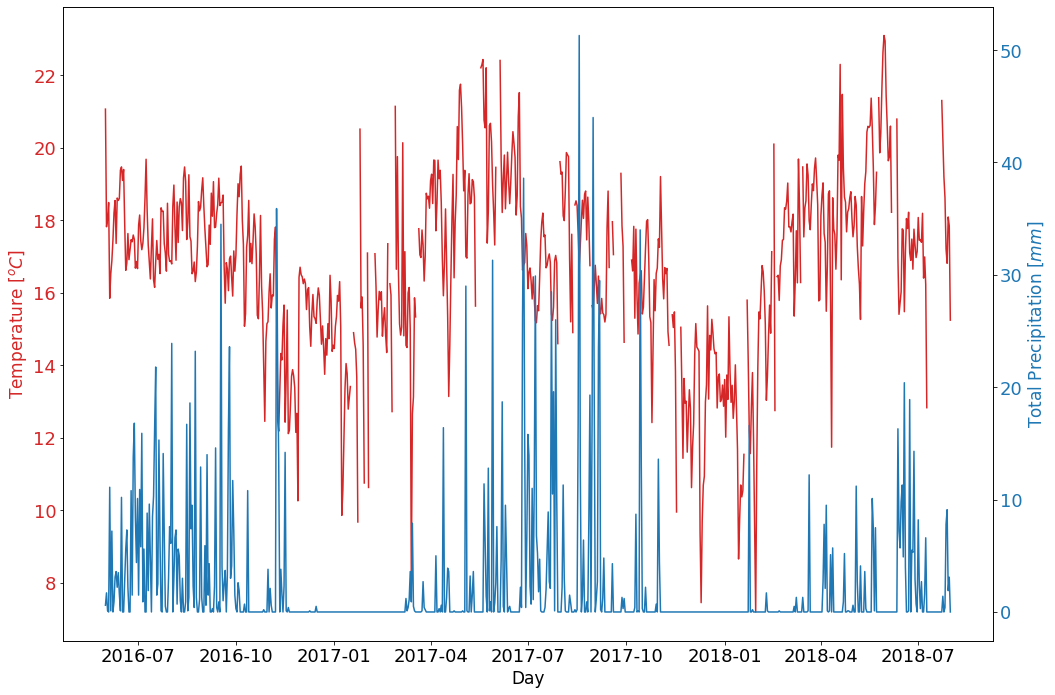

In [16]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel(r'Temperature $[^o C]$', color=color)
ax1.plot(average['date'],average['temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.label.set_size(17)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel(r'Total Precipitation $[mm]$', color=color)
ax2.plot(average['date'],daily_sum['total_precipitation'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.label.set_size(17)

ax1.xaxis.label.set_size(17)

fig.tight_layout()
#plt.show()
plt.savefig('daily.png')

## Datos mensuales

In [17]:
average_month = df.groupby([df['year_month']]).mean().reset_index()

In [18]:
average_month

,year_month,temperature,humidity,total_precipitation
0,2016-06-01,17.804209,64.289548,0.168927
1,2016-07-01,17.428750,67.235954,0.256048
2,2016-08-01,17.911841,66.875793,0.213978
3,2016-09-01,17.510542,68.544986,0.223889
4,2016-10-01,16.789409,61.457836,0.027285
5,2016-11-01,14.385793,67.483414,0.137110
6,2016-12-01,15.395484,56.396089,0.000808
7,2017-01-01,14.063466,49.792391,0.000000
8,2017-02-01,15.686535,35.338540,0.000000
9,2017-03-01,16.316408,45.984958,0.032709


In [19]:
monthly_sum = df.groupby([df['year_month']]).sum().reset_index()

In [20]:
monthly_sum.dtypes

year_month             datetime64[ns]
temperature                   float64
humidity                      float64
total_precipitation           float64
dtype: object

In [21]:
monthly_sum

,year_month,temperature,humidity,total_precipitation
0,2016-06-01,12605.38,45517.00,119.6
1,2016-07-01,12966.99,50023.55,190.5
2,2016-08-01,13326.41,49755.59,159.2
3,2016-09-01,12607.59,49352.39,161.2
4,2016-10-01,12491.32,45724.63,20.3
5,2016-11-01,10156.37,47643.29,96.8
6,2016-12-01,11454.24,41958.69,0.6
7,2017-01-01,8114.62,27485.40,0.0
8,2017-02-01,6337.36,14276.77,0.0
9,2017-03-01,9675.63,27269.08,19.2


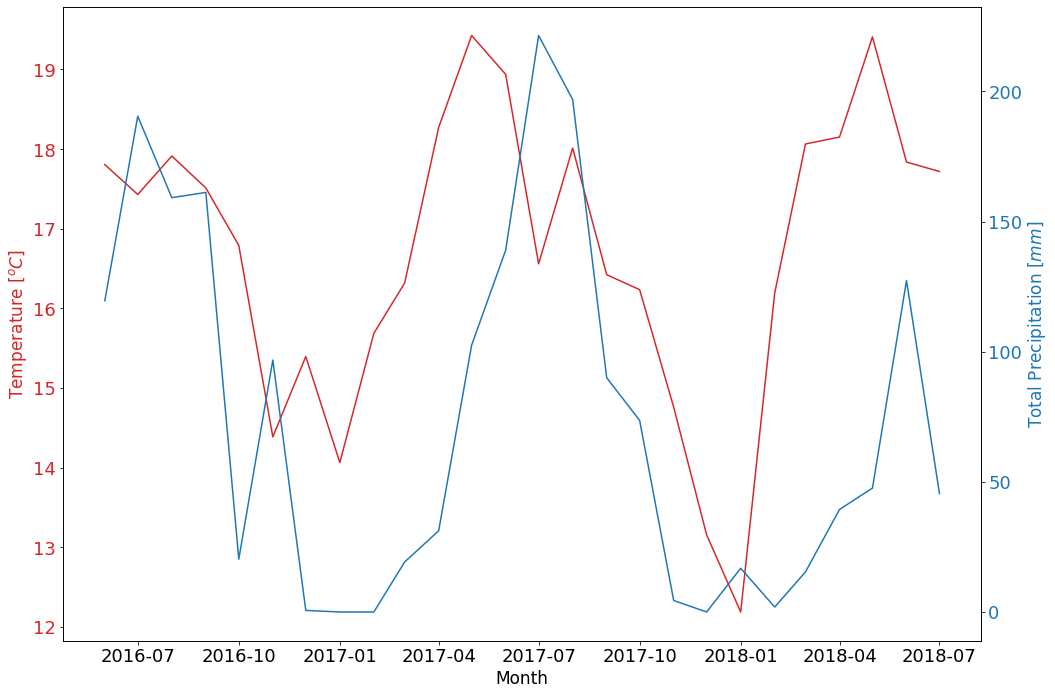

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel(r'Temperature $[^o C]$', color=color)
ax1.plot(average_month['year_month'],average_month['temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.label.set_size(17)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel(r'Total Precipitation $[mm]$', color=color)
ax2.plot(monthly_sum['year_month'],monthly_sum['total_precipitation'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.label.set_size(17)

ax1.xaxis.label.set_size(17)

fig.tight_layout()
#plt.show()
plt.savefig('monthly.png')